## 多序列 ARIMAX

In [5]:
#coding utf-8
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import style
style.use('ggplot')   #图画风格
plt.rcParams['font.sans-serif'] = ['SimHei']  #字体风格
plt.rcParams['axes.unicode_minus'] = False    #用来正常显示负号
plt.rcParams['figure.figsize'] = (12,7)       #图像大小

In [6]:
#用2015年的数据
FILE_NAME = '../input/years/2015_year.csv'  
START_POINT = '2015/1/1 0:00:00'     #第一个时刻点
source_df = pd.read_csv(FILE_NAME,index_col=0)   #读入csv文件
index_col = pd.date_range(START_POINT,periods=len(source_df),freq='h')   #产生日期index
source_df = pd.DataFrame(np.array(source_df),index=index_col,columns=source_df.columns) #产生标准日期格式的DataFrame
print("产生的日期格式like this: ",source_df.index[0])
print("dataframe de 第一条记录如下:")
source_df.head(1)

产生的日期格式like this:  2015-01-01 00:00:00
dataframe de 第一条记录如下:


,zhexi_in,xiaoxi_out,lengshuijiang_add,xinhua_add,zhexi_add
2015-01-01,180.475,67.0,0.0,0.0,0.0


/home/harrison/anaconda3/lib/python3.7/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


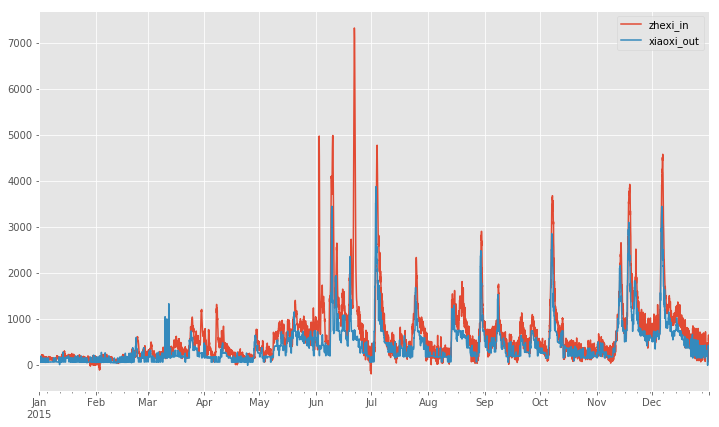

In [8]:
#coding=gbk
#使用ARIMAX 模型对非平稳时间序列记性建模操作
#差分运算具有强大的确定性的信息提取能力， 许多非平稳的序列差分后显示出平稳序列的性质， 这是称这个非平稳序列为差分平稳序列。 
#对差分平稳序列可以还是要ARMA 模型进行拟合， ARIMA 模型的实质就是差分预算与 ARMA 模型的结合。 
from statsmodels.tsa.arima_model import ARIMA 

data = source_df[['zhexi_in','xiaoxi_out']]  #单序列

#画出时序图  
data.plot()
plt.show()

In [9]:
# import statsmodels.api as sm
# print(sm.tsa.stattools.adfuller(data['xiaoxi_out'],maxlag=75))
# print(sm.tsa.stattools.adfuller(data['zhexi_in'],maxlag=75))

(-6.840652752235284, 1.7948561697845975e-09, 52, 8707, {'1%': -3.431101260930503, '5%': -2.861872007212997, '10%': -2.566946722477775}, 97399.33514319369)
(-6.569704347056374, 7.993088583313892e-09, 71, 8688, {'1%': -3.431102904367241, '5%': -2.8618727334103733, '10%': -2.5669471090376983}, 97722.19638453466)


In [10]:
# data['const']=1
# model1=sm.OLS(endog=data['zhexi_in'],exog=data[['xiaoxi_out','const']])
# results1=model1.fit()
# print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:               zhexi_in   R-squared:                       0.622
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                 1.441e+04
Date:                Thu, 17 Oct 2019   Prob (F-statistic):               0.00
Time:                        21:14:04   Log-Likelihood:                -65629.
No. Observations:                8760   AIC:                         1.313e+05
Df Residuals:                    8758   BIC:                         1.313e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
xiaoxi_out     1.2475      0.010    120.053      0.0

/home/harrison/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [11]:
# data['diffZ']=data['zhexi_in'].diff()
# data['diffX']=data['xiaoxi_out'].diff()
# model2=sm.OLS(endog=data['diffZ'].dropna(),exog=data[['diffX','const']].dropna())
# results2=model2.fit()
# print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                  diffZ   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.07170
Date:                Thu, 17 Oct 2019   Prob (F-statistic):              0.789
Time:                        21:16:45   Log-Likelihood:                -51567.
No. Observations:                8759   AIC:                         1.031e+05
Df Residuals:                    8757   BIC:                         1.032e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
diffX          0.0037      0.014      0.268      0.7

/home/harrison/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [12]:
# print(sm.tsa.stattools.grangercausalitytests(data[['xiaoxi_out','zhexi_in']].dropna(),1))


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.5334  , p=0.4652  , df_denom=8756, df_num=1
ssr based chi2 test:   chi2=0.5336  , p=0.4651  , df=1
likelihood ratio test: chi2=0.5336  , p=0.4651  , df=1
parameter F test:         F=0.5334  , p=0.4652  , df_denom=8756, df_num=1
{1: ({'ssr_ftest': (0.533398889699328, 0.4652009302908263, 8756.0, 1), 'ssr_chi2test': (0.5335816440014178, 0.46510494209315423, 1), 'lrtest': (0.5335653922666097, 0.4651117395841673, 1), 'params_ftest': (0.5333988897000054, 0.4652009302908263, 8756.0, 1.0)}, [<statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f01311b8048>, <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x7f01311b8cc0>, array([[0., 1., 0.]])])}


In [13]:
from statsmodels.tsa.arima_model import ARIMA 
import tqdm

#pmax = int(len(df_data) / 10)    
#qmax = int(len(df_data) / 10)
pmax = 3
qmax = 10
bic_matrix = []
for p in tqdm.tqdm(range(pmax +1)):
    temp= []
    for q in tqdm.tqdm(range(qmax+1)):
        try:
            bic = ARIMA(endog=data['zhexi_in'][:1200], order=(p, 1, q),exog=data['xiaoxi_out'][:1200]).fit().bic
            print(bic)
            temp.append(bic)
        except:
            temp.append(None)
    bic_matrix.append(temp)

bic_matrix = pd.DataFrame(bic_matrix)   #将其转换成Dataframe 数据结构
p,q = bic_matrix.stack().idxmin()   #先使用stack 展平， 然后使用 idxmin 找出最小值的位置
print(u'BIC 最小的p值 和 q 值：%s,%s' %(p,q))  #  BIC 最小的p值 和 q 值：0,1

11533.10245474168
11270.213502278013
11254.582345922556
11256.586824658594
11263.674898355004
11170.82295681306
10940.912211493885
10884.333969074138
10878.420377242988
10885.493387176824
11269.589688985678
11258.365495981016
11258.616285586008
11210.483450997956
11217.48009949579
11200.81602161863
10874.181908382167
10880.925996216014
10881.217774317958
10889.36502712781
10895.68843722957
11256.805032213026
11192.37715482848
11199.33460778358
11217.3575483326
11147.773761771423
11084.848236033447
10880.77649380939
10881.810027174171
10889.545783214086
10887.419544148017
10891.743719821143
11263.88271127534
11228.884625718907
11159.433360502373
11173.94733522278
11154.795860309308
11055.226711480205
10883.755992521414
10888.172293902939
10891.957986036126


/home/harrison/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


10897.726392857652


/home/harrison/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:607: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()
/home/harrison/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/tsatools.py:609: RuntimeWarning: invalid value encountered in true_divide
  (1+np.exp(-params))).copy()


11267.97942768084
11188.03637331516
11162.790452660427
11097.347144586178
11010.584278012415
11016.424018996067
10890.730790535777
10897.630413301662
10881.99130245603


/home/harrison/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/home/harrison/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


10897.653336082321


/home/harrison/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


10892.613158602015
11186.064042920274
11165.26051166434
11092.421473505974
11095.849912781112
11056.79005928409
11024.128063169166
10895.05768075859
10896.32405504946


/home/harrison/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


10869.064613116449


/home/harrison/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


10900.797531546397
10883.041690164227
BIC 最小的p值 和 q 值：5,8


/home/harrison/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [30]:
train_end_point = 1200
predict_len = 10
model = ARIMA(data['zhexi_in'][:train_end_point], (p,1,q),data['xiaoxi_out'][:train_end_point]).fit()
print(model.summary2())        #生成一份模型报告

/home/harrison/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


                           Results: ARIMA
Model:              ARIMA            BIC:                 10869.0646
Dependent Variable: D.zhexi_in       Log-Likelihood:      -5377.8   
Date:               2019-10-17 21:48 Scale:               1.0000    
No. Observations:   1199             Method:              css-mle   
Df Model:           15               Sample:              01-01-2015
Df Residuals:       1184                                  02-19-2015
Converged:          0.0000           S.D. of innovations: 21.419    
No. Iterations:     500.0000         HQIC:                10818.311 
AIC:                10787.6367                                      
--------------------------------------------------------------------
                     Coef.  Std.Err.    t     P>|t|   [0.025  0.975]
--------------------------------------------------------------------
const               -0.7994   0.5397  -1.4814 0.1388 -1.8572  0.2583
xiaoxi_out           0.0077   0.0051   1.5151 0.1300 -0.0023 

In [43]:
xiaoxi_out = data['xiaoxi_out'].values
exogs = []
for i in range(predict_len):
    exogs.append(np.array(xiaoxi_out[train_end_point+i]))
exogs = np.array(exogs)
exogs

array([72., 72., 69., 58., 58., 58., 58., 66., 67., 69.])

In [44]:
forecast = model.forecast(10,exog=exogs)   #为未来5天进行预测， 返回预测结果， 标准误差， 和置信区间

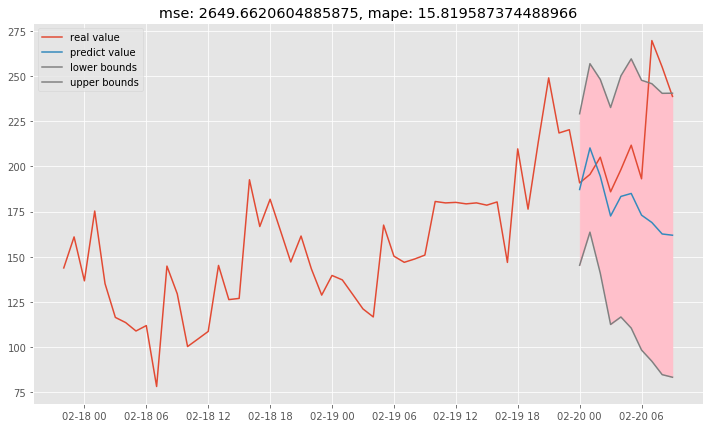

<Figure size 864x504 with 0 Axes>

In [49]:
from sklearn.metrics import mean_squared_error as mse
def mape(y_true, y_pred):
    """
    参数:
    y_true -- 测试集目标真实值
    y_pred -- 测试集目标预测值
    
    返回:
    mape -- MAPE 评价指标
    """
    
    n = len(y_true)
    mape = sum(np.abs((y_true - y_pred)/y_true))/n*100
    return mape

index = pd.date_range(start=data.index[train_end_point],periods=len(forecast[0]),freq='h')
plt.plot(data['zhexi_in'][train_end_point-50:train_end_point+len(forecast[0])])
plt.plot(index,forecast[0])

lower_values = [i[0] for i in forecast[2]]
upper_values = [i[1] for i in forecast[2]]
plt.plot(index,lower_values,color='gray')
plt.plot(index,upper_values,color='gray')
plt.fill_between(index,lower_values,upper_values,color='pink')
plt.legend(('real value','predict value','lower bounds','upper bounds'))
y_true = data['zhexi_in'][train_end_point:train_end_point+predict_len]
y_pred = forecast[0]
mse = mse(y_true,y_pred)
mape = mape(y_true,y_pred)
plt.title(f'mse: {mse}, mape: {mape}')
plt.show()
plt.savefig('result_arimax.png',dpi=120)